In [1]:
from fi_cbl.model import FICBL
from mnist_4_fig_expreriment import get_proc_mnist_np, get_4mnist_ds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from experiment_models import Autoencoder, BottleNeck, AutoEncClustering, quarter_patcher
from sklearn.metrics import accuracy_score

Text(0.5, 0.98, 'Example of the dataset point')

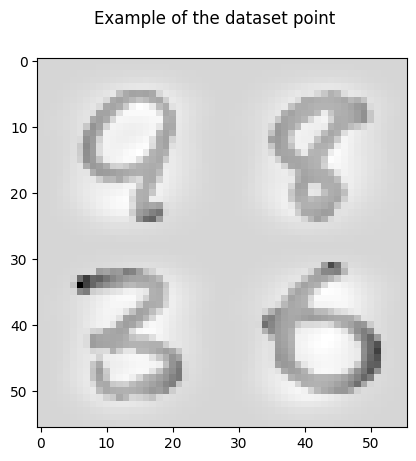

In [2]:
# getting the dataset
n = 1000
X, y, c = get_4mnist_ds(*get_proc_mnist_np(), n)
plt.imshow(X[0, 0, ...], 'binary')
plt.suptitle('Example of the dataset point')

In [3]:
# defining model parameters
cls_num = 128
eps = 0.001
ae_kw = {
    'latent_dim': 16, 
    'epochs_num': 40, 
    'batch_num': 256, 
    'l_r': 1e-3, 
    'device': 'cuda'
}

# splitting the data
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(X, y, c, test_size=0.4) 

# creating models
clusterizer = AutoEncClustering(cls_num, Autoencoder(**ae_kw))
model_ficbl = FICBL(cls_num, clusterizer, quarter_patcher, eps)
model_ficbl.fit(X_train, y_train, c_train)
model_cbm = BottleNeck(1, ae_kw['epochs_num'], 256, 1e-3, 'cuda', None)
model_cbm.fit(X_train, y_train, c_train)
clear_output()

In [4]:
# getting predicitons
pred_ficbl = model_ficbl.predict(X_test)
pred_cbm = model_cbm.predict(X_test)
target_pred_ficbl, target_pred_cbm = pred_ficbl[:, 0], pred_cbm[:, 0]
ficbl_acc = accuracy_score(y_test, target_pred_ficbl)
cbm_acc = accuracy_score(y_test, target_pred_cbm)
print('FI-CBL target accuracy:', ficbl_acc)
print('CBM target accuracy:', cbm_acc)

FI-CBL target accuracy: 0.5
CBM target accuracy: 0.485
